## a)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()
import statsmodels.formula.api as smf
import pingouin as pg

In [2]:
# read data set
massimmigration = pd.read_excel('massimmigration.xlsx')
massimmigration.head()

,Kanton,Flaeche,Einwohner,Auslaender,Akzeptanz
0,AG,1404,627893,23.0,55.2
1,AR,243,53438,14.6,54.4
2,AI,173,15789,9.9,63.5
3,BL,518,276537,20.1,50.6
4,BS,37,194661,34.4,39.0


In [3]:
# The sought correlations are located in the last row or the last column, respectively.
massimmigration.corr(numeric_only=True)

,Flaeche,Einwohner,Auslaender,Akzeptanz
Flaeche,1.000000,0.399957,-0.064231,-0.097686
Einwohner,0.399957,1.000000,0.318527,-0.312074
Auslaender,-0.064231,0.318527,1.000000,-0.512695
Akzeptanz,-0.097686,-0.312074,-0.512695,1.000000


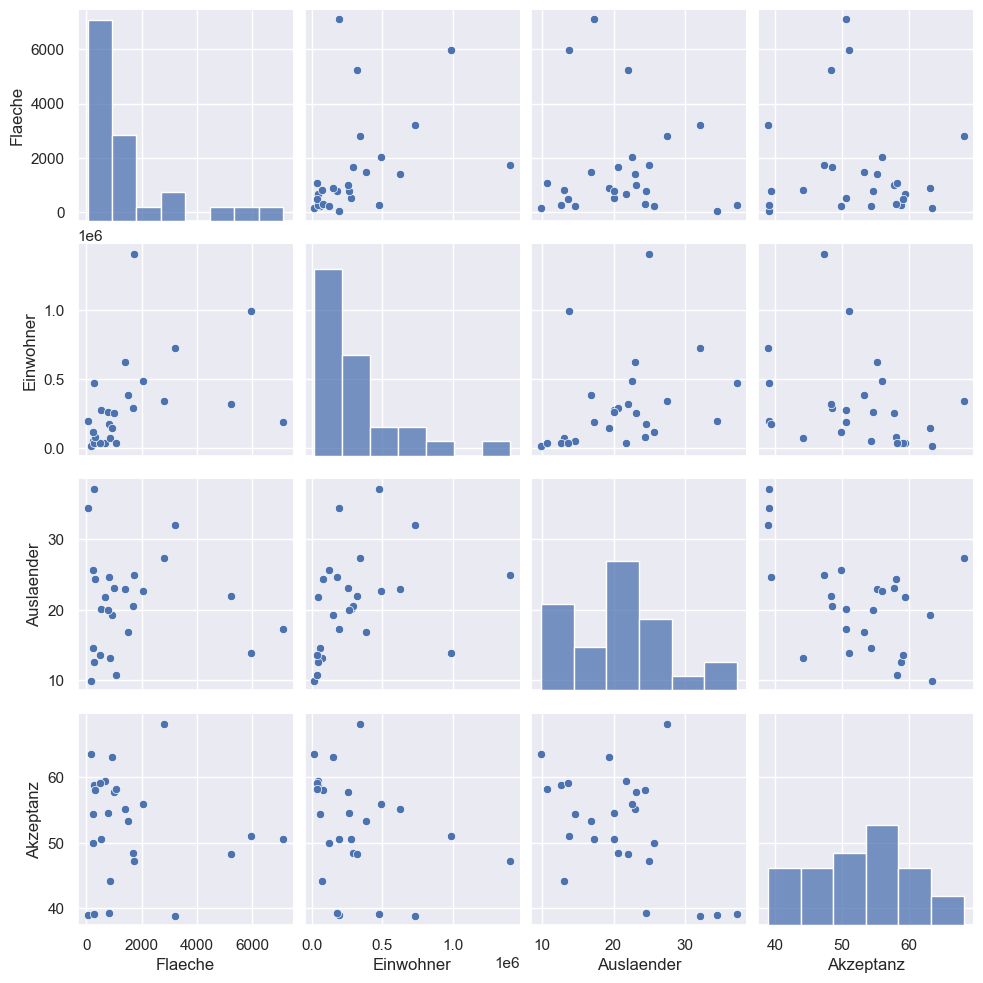

In [4]:
# The scatter plots (with acceptance) can be found in the last row or the last column, respectively.
sns.pairplot(massimmigration)

## b)

In [5]:
model = smf.ols('Akzeptanz ~ Auslaender', data=massimmigration).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Akzeptanz   R-squared:                       0.263
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     8.558
Date:                Fri, 12 Sep 2025   Prob (F-statistic):            0.00740
Time:                        13:07:21   Log-Likelihood:                -86.469
No. Observations:                  26   AIC:                             176.9
Df Residuals:                      24   BIC:                             179.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     64.8317      4.417     14.676      0.000      55.715      73.949
Auslaender    -0.5853      0.200     -2.925      0.007      -0.998      -0.172
==============================================================================
Omnibus:                        4.332   Durbin-Watson:                   1.252
Prob(Omnibus):                  0.115   Jarque-Bera (JB):                2.555
Skew:                           0.614   Prob(JB):                        0.279
Kurtosis:                       3.922   Cond. No.                         71.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The percentage of foreigners has a significant effect on acceptance. However, the coefficient of determination is very low.

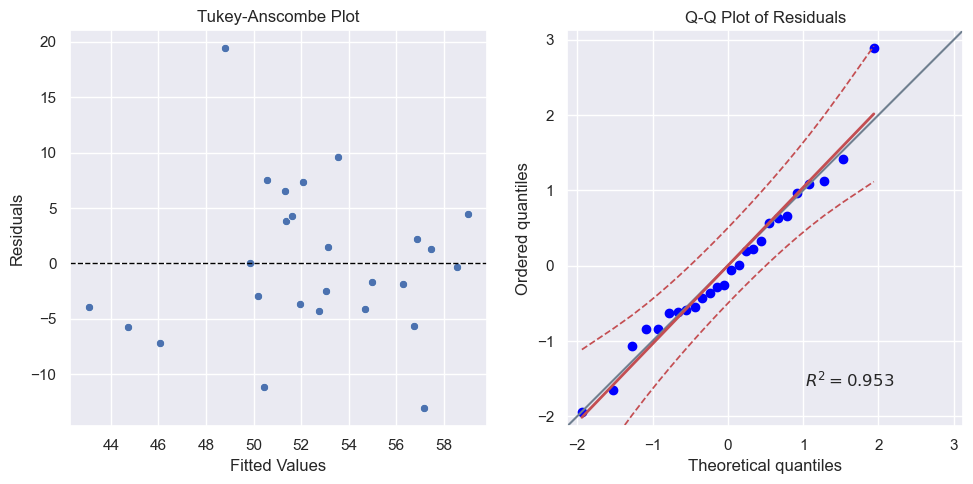

In [6]:
import pingouin as pg

# Create a figure with two subplots side by side
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Tukey-Anscombe plot
sns.scatterplot(x=model.fittedvalues, y=model.resid, ax=ax[0])
ax[0].axhline(0, color='black', linestyle='--', linewidth=1)
ax[0].set_xlabel("Fitted Values")
ax[0].set_ylabel("Residuals")
ax[0].set_title("Tukey-Anscombe Plot")

# Q-Q plot of residuals
pg.qqplot(model.resid, ax=ax[1])
ax[1].set_title("Q-Q Plot of Residuals")

# Adjust layout and show the figure
plt.tight_layout()
plt.show()

## c)

In [7]:
model2 = smf.ols('Akzeptanz ~ Flaeche + Einwohner + Auslaender', data=massimmigration).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Akzeptanz   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     3.027
Date:                Fri, 12 Sep 2025   Prob (F-statistic):             0.0511
Time:                        13:07:21   Log-Likelihood:                -85.942
No. Observations:                  26   AIC:                             179.9
Df Residuals:                      22   BIC:                             184.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     65.4605      4.826     13.565      0.000      55.453      75.468
Flaeche       -0.0003      0.001     -0.380      0.707      -0.002       0.001
Einwohner  -3.165e-06   5.15e-06     -0.615      0.545   -1.38e-05    7.51e-06
Auslaender    -0.5437      0.221     -2.455      0.022      -1.003      -0.084
==============================================================================
Omnibus:                        5.358   Durbin-Watson:                   1.348
Prob(Omnibus):                  0.069   Jarque-Bera (JB):                3.756
Skew:                           0.553   Prob(JB):                        0.153
Kurtosis:                       4.498   Cond. No.                     1.53e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.53e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Auslaender is still the only significant variable. Also, the coefficient of determination has not increased substantially. This is a common issue in socio-economic studies: it is never possible to measure all the variables that satisfactorily explain a given outcome.

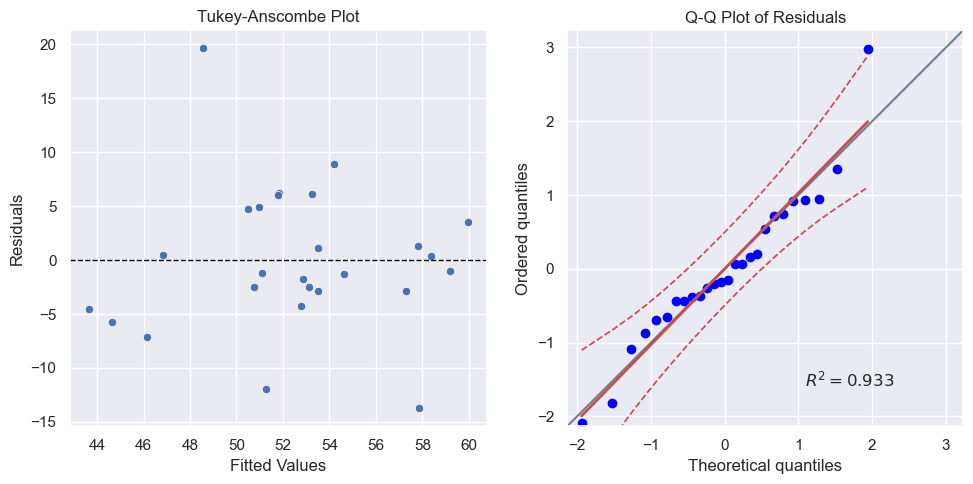

In [8]:
# Create a figure with two subplots side by side
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Tukey-Anscombe plot
sns.scatterplot(x=model2.fittedvalues, y=model2.resid, ax=ax[0])
ax[0].axhline(0, color='black', linestyle='--', linewidth=1)
ax[0].set_xlabel("Fitted Values")
ax[0].set_ylabel("Residuals")
ax[0].set_title("Tukey-Anscombe Plot")

# Q-Q plot of residuals
pg.qqplot(model2.resid, ax=ax[1])
ax[1].set_title("Q-Q Plot of Residuals")

# Adjust layout and show the figure
plt.tight_layout()
plt.show()